<a href="https://colab.research.google.com/github/PrashantAoutade/VTG/blob/master/Without_Transfer_Learning_VTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from tensorflow import keras

from PIL import ImageFile

In [ ]:
path = os. getcwd()
print(path)
path_beach_and_church = f"{getcwd()}/../content/drive/My Drive/VTG/VTG Multiclass Photos.zip"
#shutil.rmtree('/tmp')

local_zip = path_beach_and_church
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

/content


In [ ]:
base_dir = '/tmp/VTG Photos'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training beach/church pictures
train_beach_dir = os.path.join(train_dir, 'Beach')
train_church_dir = os.path.join(train_dir, 'Church')
train_pyramid_dir=os.path.join(train_dir, 'Pyramid')
train_statue_dir=os.path.join(train_dir, 'Statue of Unity')
train_taj_dir=os.path.join(train_dir, 'Taj Mahal')

# Directory with our validation beach/church pictures
validation_beach_dir = os.path.join(validation_dir, 'Beach')
validation_church_dir = os.path.join(validation_dir, 'Church')
validation_pyramid_dir=os.path.join(validation_dir, 'Pyramid')
validation_statue_dir=os.path.join(validation_dir, 'Statue of Unity')
validation_taj_dir=os.path.join(validation_dir, 'Taj Mahal')

In [ ]:
train_beach_fnames = os.listdir( train_beach_dir )
train_church_fnames = os.listdir( train_church_dir )
train_pyramid_fnames=os.listdir(train_pyramid_dir)
train_statue_fnames=os.listdir(train_statue_dir)
train_taj_fnames=os.listdir(train_taj_dir)

print(train_beach_fnames[:10])
print(train_church_fnames[:10])
print(train_pyramid_fnames[:10])
print(train_statue_fnames[:10])
print(train_taj_fnames[:10])

['download (3).jpg', 'download (9).jpg', 'download (1).jpg', 'download (10).jpg', 'download (8).jpg', 'Lighthouse-beach-Kovalam-shutterstock_1070203475.jpg', 'download (2).jpg', 'download.jpg', 'download (6).jpg', 'download (11).jpg']
['immaculate-conception-church-panjim-small.jpg', 'download (3).jpg', 'download (1).jpg', 'Our-Lady-of-Immaculate-Conception.jpg', 'gettyimages-157286945-612x612.jpg', 'download (8).jpg', 'images.jpg', 'download (2).jpg', 'download.jpg', 'download (6).jpg']
['images14.jpg', 'images66.jpg', 'Egyptian-Pyramid-builders-were-paid-in-beer.jpg', 'image22.jpeg', '1055980.jpg', 'images28.jpg', 'egypt-reuters-1200.jpg', 'images29.jpg', '28805.jpg', 'image21.jpeg']
['images14.jpg', 'images7.jpg', 'image22.jpeg', 'image5.jpeg', '1539942431-6651.jpg', 'f-bro-SoU-website_comparision-image6.png', 'images28.jpg', 'image6.jpeg', 'gujarat-statue-of-unity-attracted-29-lakh-tourists-earned-rs-82-crore.jpg', 'image2.jpeg']
['images14.jpg', 'images7.jpg', 'image22.jpeg', 'ima

In [ ]:
print('total training beach images :', len(os.listdir(      train_beach_dir ) ))
print('total training church images :', len(os.listdir(      train_church_dir ) ))
print('total training Pyramid images :', len(os.listdir(      train_pyramid_dir ) ))
print('total training Statue of Unity images :', len(os.listdir(      train_statue_dir ) ))
print('total training Taj Mahal images :', len(os.listdir(      train_taj_dir ) ))

print('\ntotal validation beach images :', len(os.listdir( validation_beach_dir ) ))
print('total validation church images :', len(os.listdir( validation_church_dir ) ))
print('total validation Pyramid images :', len(os.listdir(      validation_pyramid_dir ) ))
print('total validation Statue of Unity images :', len(os.listdir(      validation_statue_dir ) ))
print('total validation Taj Mahal images :', len(os.listdir(      validation_taj_dir ) ))


total training beach images : 14
total training church images : 21
total training Pyramid images : 97
total training Statue of Unity images : 85
total training Taj Mahal images : 61

total validation beach images : 12
total validation church images : 10
total validation Pyramid images : 35
total validation Statue of Unity images : 36
total validation Taj Mahal images : 36


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 4

pic_index = 0 # Index for iterating over images

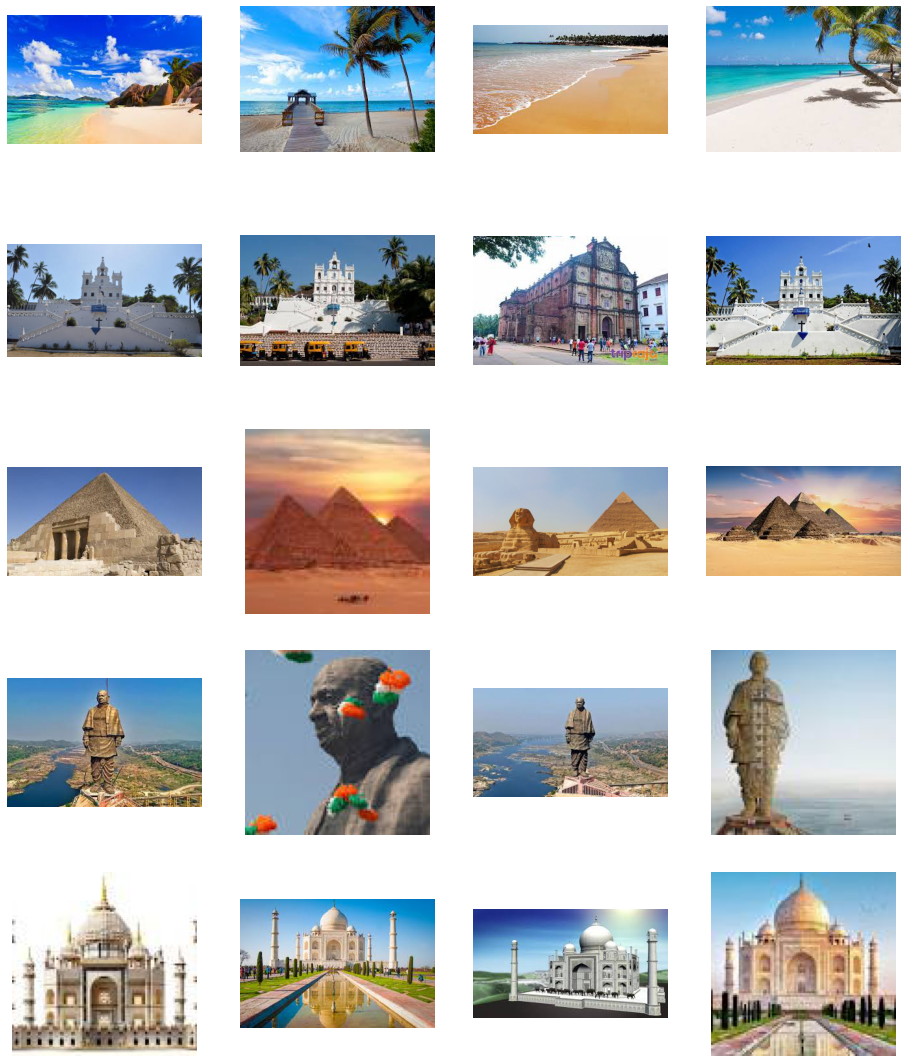

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_beach_pix = [os.path.join(train_beach_dir, fname) 
                for fname in train_beach_fnames[ pic_index-4:pic_index] 
               ]

next_church_pix = [os.path.join(train_church_dir, fname) 
                for fname in train_church_fnames[ pic_index-4:pic_index]
               ]

next_pyramid_pix = [os.path.join(train_pyramid_dir, fname) 
                for fname in train_pyramid_fnames[ pic_index-4:pic_index]
               ]

next_statue_pix = [os.path.join(train_statue_dir, fname) 
                for fname in train_statue_fnames[ pic_index-4:pic_index]
               ]

next_taj_pix = [os.path.join(train_taj_dir, fname) 
                for fname in train_taj_fnames[ pic_index-4:pic_index]
               ]
for i, img_path in enumerate(next_beach_pix+next_church_pix+next_pyramid_pix+next_statue_pix+next_taj_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1/255,
                                   rotation_range=20,
                                   width_shift_range=.2,
                                   height_shift_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale = 1./255)
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 277 images belonging to 5 classes.
Found 129 images belonging to 5 classes.


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit_generator(train_generator,
                    epochs=25,  
                    validation_data = validation_generator, 
                    verbose = 2)

Epoch 1/25
9/9 - 4s - loss: 0.5493 - val_loss: 0.7496
Epoch 2/25
9/9 - 3s - loss: 0.4468 - val_loss: 0.7370
Epoch 3/25
9/9 - 3s - loss: 0.4612 - val_loss: 0.7251
Epoch 4/25
9/9 - 3s - loss: 0.4086 - val_loss: 0.7320
Epoch 5/25
9/9 - 4s - loss: 0.4244 - val_loss: 0.7215
Epoch 6/25
9/9 - 3s - loss: 0.4097 - val_loss: 0.6941
Epoch 7/25
9/9 - 4s - loss: 0.4309 - val_loss: 0.7110
Epoch 8/25
9/9 - 3s - loss: 0.4016 - val_loss: 0.7181
Epoch 9/25
9/9 - 4s - loss: 0.3688 - val_loss: 0.6942
Epoch 10/25
9/9 - 4s - loss: 0.3715 - val_loss: 0.7130
Epoch 11/25
9/9 - 3s - loss: 0.3702 - val_loss: 0.7202
Epoch 12/25
9/9 - 3s - loss: 0.3922 - val_loss: 0.6526
Epoch 13/25
9/9 - 3s - loss: 0.4057 - val_loss: 0.6647
Epoch 14/25
9/9 - 4s - loss: 0.3781 - val_loss: 0.6734
Epoch 15/25
9/9 - 4s - loss: 0.3854 - val_loss: 0.6762
Epoch 16/25
9/9 - 3s - loss: 0.3618 - val_loss: 0.6733
Epoch 17/25
9/9 - 3s - loss: 0.3722 - val_loss: 0.6974
Epoch 18/25
9/9 - 3s - loss: 0.3136 - val_loss: 0.6550
Epoch 19/25
9/9 - 3

In [ ]:

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0][0])
  print(type(classes[0]))
  if classes[0][0]>0:
    print(fn + " is a Beach")
  elif classes[0][1]>0:
    print(fn + " is a Church")
  elif classes[0][2]>0:
    print(fn + " is a Pyramid")
  elif classes[0][3]>0:
    print(fn + " is a Statue of Unity")
  else:
    print(fn + " is a Taj Mahal")
 

Saving 630x355.jpg to 630x355.jpg
Saving 1200px-Varkala.jpg to 1200px-Varkala.jpg
Saving download (1).jpg to download (1).jpg
Saving download (12).jpg to download (12).jpg
Saving download.jpg to download.jpg
Saving images (1).jpg to images (1) (1).jpg
0.0
<class 'numpy.ndarray'>
630x355.jpg is a Statue of Unity
0.0
<class 'numpy.ndarray'>
1200px-Varkala.jpg is a Taj Mahal
1.0
<class 'numpy.ndarray'>
download (1).jpg is a Beach
1.0
<class 'numpy.ndarray'>
download (12).jpg is a Beach
1.0
<class 'numpy.ndarray'>
download.jpg is a Beach
0.0
<class 'numpy.ndarray'>
images (1).jpg is a Church
